Epoch 1: Top-1 Accuracy = 60.90%
Epoch 2: Top-1 Accuracy = 62.63%
Epoch 3: Top-1 Accuracy = 60.55%
Epoch 4: Top-1 Accuracy = 50.87%
Epoch 5: Top-1 Accuracy = 58.82%
Epoch 6: Top-1 Accuracy = 55.71%
Epoch 7: Top-1 Accuracy = 54.33%
Epoch 8: Top-1 Accuracy = 50.52%
Epoch 9: Top-1 Accuracy = 55.02%
Epoch 10: Top-1 Accuracy = 52.60%
Epoch 11: Top-1 Accuracy = 54.67%
Epoch 12: Top-1 Accuracy = 50.87%
Epoch 13: Top-1 Accuracy = 55.71%
Epoch 14: Top-1 Accuracy = 56.06%


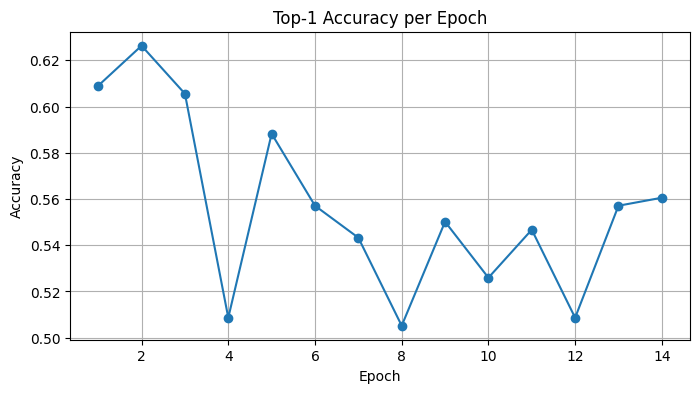

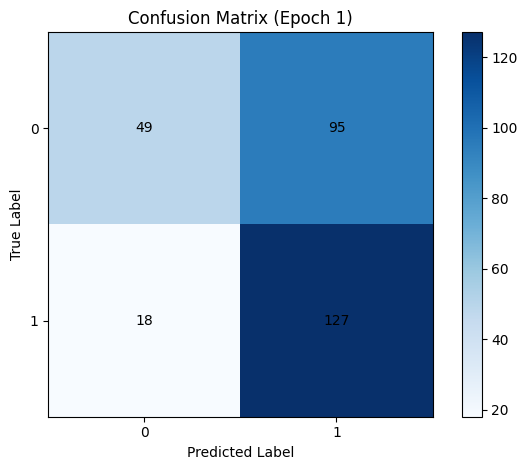

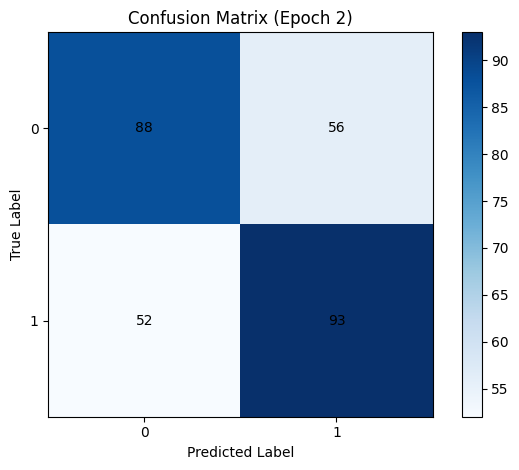

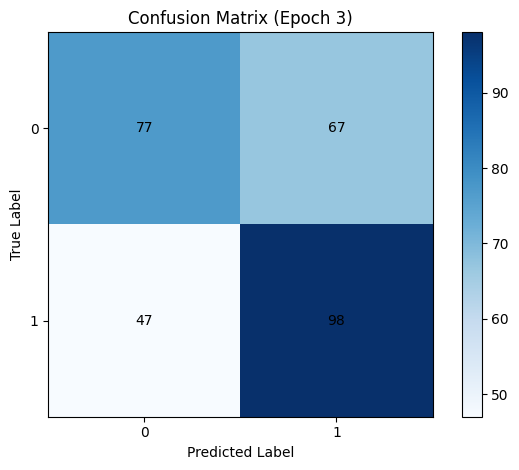

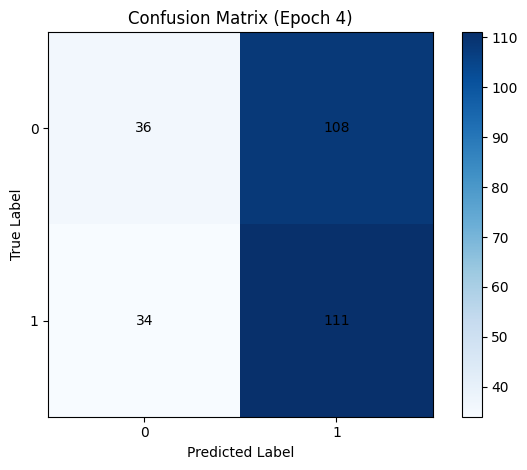

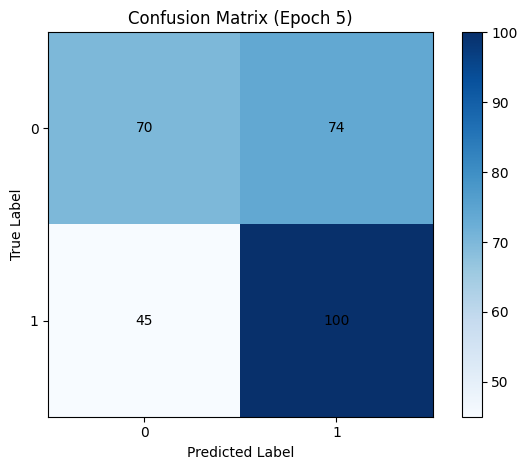

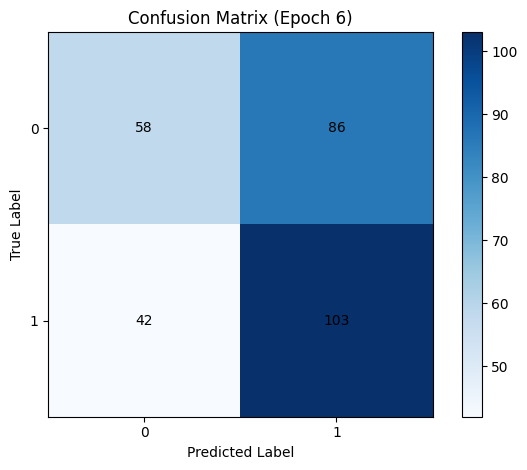

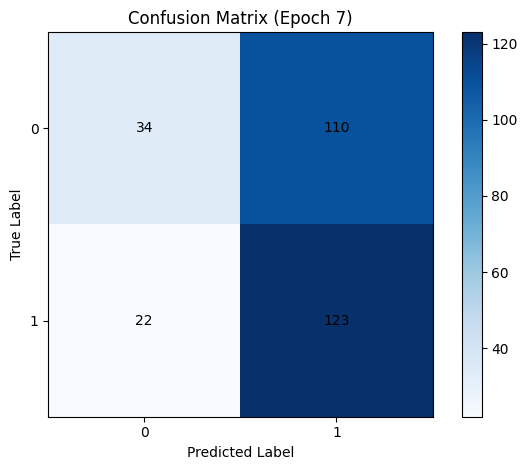

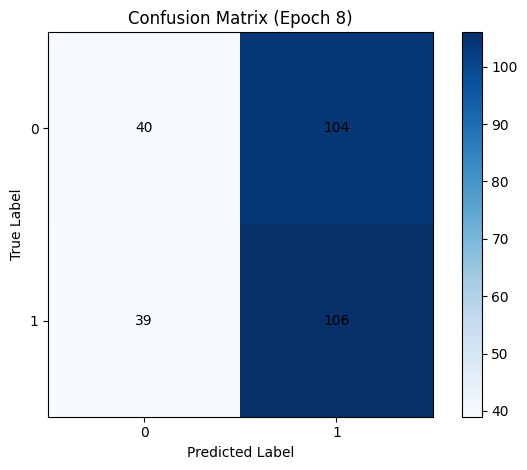

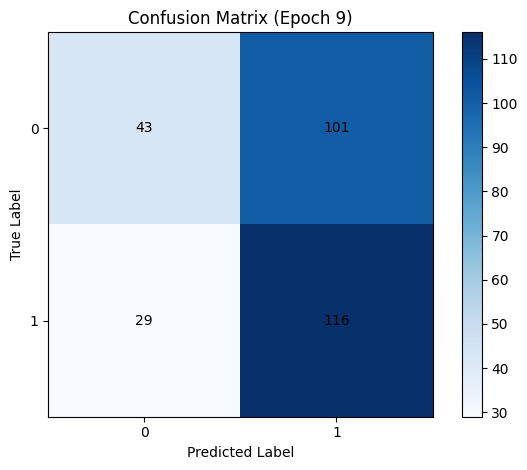

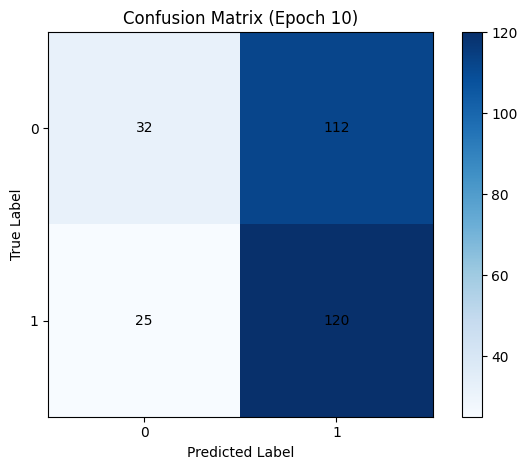

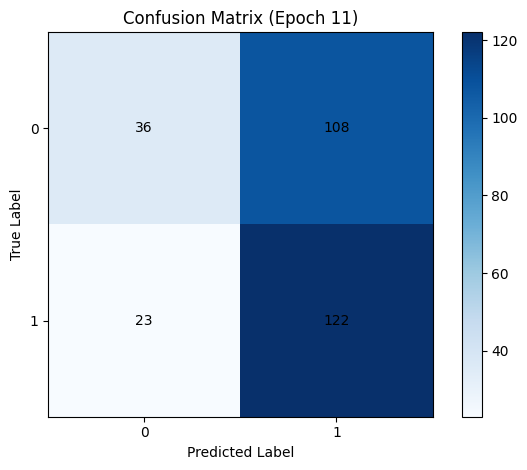

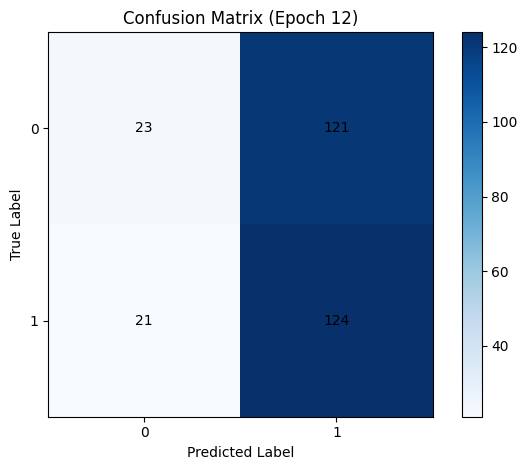

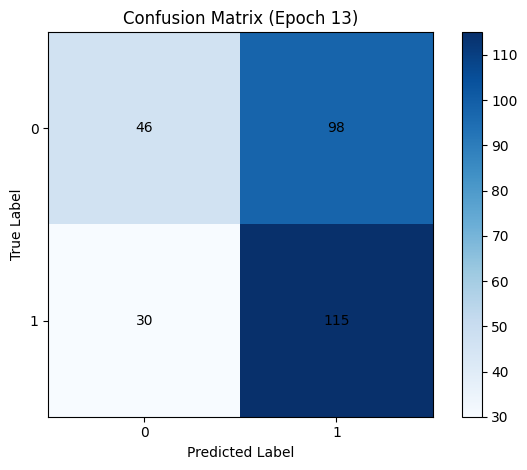

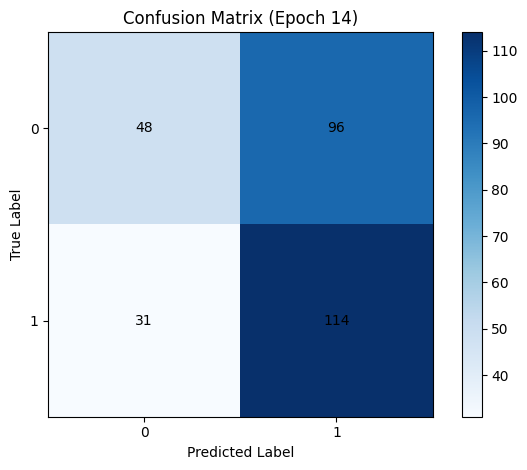

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

result_dir = r"D:\mmaction2\result"
epoch_range = range(1, 15)  # 1~14

accuracies = []
cms = []
labels_global = None

for epoch in epoch_range:
    result_path = os.path.join(result_dir, f"result_{epoch}.pkl")
    if not os.path.exists(result_path):
        print(f"[Warning] {result_path} not found. Skipping epoch {epoch}.")
        continue

    with open(result_path, "rb") as f:
        results = pickle.load(f)

    rows = []
    for entry in results:
        rows.append({
            "gt_label": int(entry["gt_label"].item()),
            "pred_label": int(entry["pred_label"].item()),
        })
    df = pd.DataFrame(rows)

    accuracy = (df["gt_label"] == df["pred_label"]).mean()
    accuracies.append(accuracy)

    labels = sorted(df["gt_label"].unique())
    if labels_global is None:
        labels_global = labels
    cm = confusion_matrix(df["gt_label"], df["pred_label"], labels=labels_global)
    cms.append(cm)

    print(f"Epoch {epoch}: Top-1 Accuracy = {accuracy:.2%}")

# 전체 Accuracy 비교 시각화
plt.figure(figsize=(8,4))
plt.plot(list(epoch_range)[:len(accuracies)], accuracies, marker='o')
plt.title("Top-1 Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# 각 epoch별 Confusion Matrix 시각화
for idx, epoch in enumerate(epoch_range[:len(cms)]):
    plt.figure()
    plt.imshow(cms[idx], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Epoch {epoch})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(range(len(labels_global)), labels_global)
    plt.yticks(range(len(labels_global)), labels_global)
    for i in range(len(labels_global)):
        for j in range(len(labels_global)):
            plt.text(j, i, cms[idx][i, j], ha="center", va="center")
    plt.colorbar()
    plt.tight_layout()
    plt.show()